In [1]:
# import export
# https://aroussi.com/post/python-yahoo-finance
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#historical-time-series-data
import yfinance as yf
from pandas_datareader import data as web
ALPHAVANTAGE_API_KEY = "E2S9WCQXMIMBMR61"
AVAILABLE_THREADS = 2

##coucouniels test 16h54 16/04
# finance libraries
import pandas as pd
import numpy as np

# plot libraries 
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)

#CODE après modification 

/Users/nielsou/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# Retrieving tickers symbols

# stocks
stock_list = pd.read_csv('data_finance/stocks.csv')['symbol_yf'].tolist()
# index
index_csv = pd.read_csv('data_finance/index.csv')
pref_index = ['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225']
index_list = index_csv[index_csv['symbol_yf'].isin(['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225'])]['symbol_yf'].tolist()
# vix
vix_list = pd.read_csv('data_finance/vix.csv')['symbol_fred'].tolist()
# currency
currency_list = pd.read_csv('data_finance/currencies.csv')['symbol_yf'].tolist()

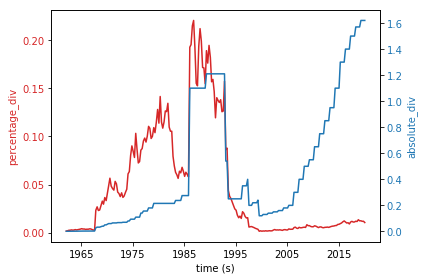

In [3]:
msft = yf.Ticker("IBM")
# get stock info
msft.info
percentage_div = msft.dividends / msft.history(period="max")['Close'].loc[msft.dividends.index]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('percentage_div', color=color)
ax1.plot(percentage_div, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('absolute_div', color=color)  # we already handled the x-label with ax1
ax2.plot(msft.dividends, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

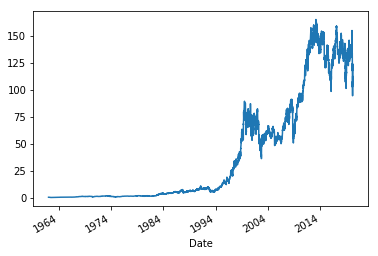

In [4]:
#ajouter au graph d'au dessus avec un 3eme axe
msft.history(period='max')['Close'].plot()


[*********************100%***********************]  15 of 15 completed


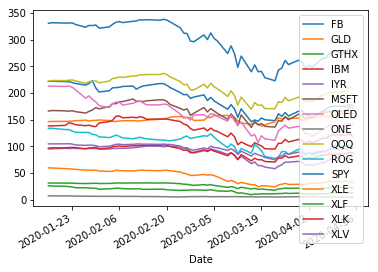

In [5]:
data = yf.download(stock_list, period="3mo", thread = AVAILABLE_THREADS)['Close']
data.plot()
plt.show()


[*********************100%***********************]  7 of 7 completed


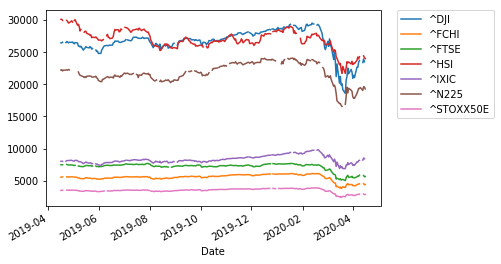

In [6]:
data = yf.download(index_list, period="1Y", thread = AVAILABLE_THREADS)['Close']
data.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


/Users/nielsou/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


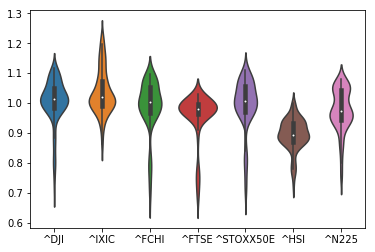

In [7]:
# running various draws of most common index 
favourite_index = ['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225']
scaled_index = data[favourite_index]/data[favourite_index].iloc[1]
scaled_index.to_csv('logs/prefered_scaled_index.csv')
ax = sns.violinplot(data=scaled_index)

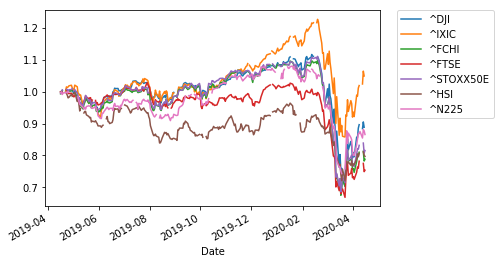

In [8]:
scaled_index.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

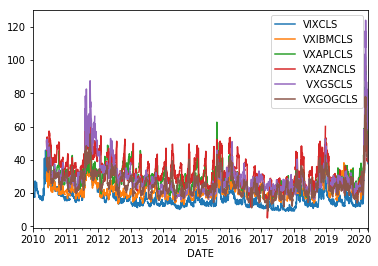

In [9]:
# retrieving vix volatilities levels
vixs = web.DataReader(vix_list, data_source='fred', start='2010-1-1', api_key=ALPHAVANTAGE_API_KEY)
vixs.plot()

In [10]:
# retrieving exchange rates
fx = yf.download(' EURJPY=X', period="1Y", thread = AVAILABLE_THREADS)


[*********************100%***********************]  1 of 1 completed


In [11]:
fx = yf.download(currency_list, period="1Y", thread = AVAILABLE_THREADS)


[*********************100%***********************]  3 of 3 completed


In [13]:
fx

Adj Close                              Close               \
              EURJPY=X     EURKRW=X  EURUSD=X    EURJPY=X     EURKRW=X   
Date                                                                     
2019-04-16  126.549004  1281.800049  1.130493  126.549004  1281.800049   
2019-04-17  126.337997  1282.300049  1.128503  126.337997  1282.300049   
2019-04-18  126.544998  1277.699951  1.129714  126.544998  1277.699951   
2019-04-19  125.820999  1276.199951  1.123595  125.820999  1276.199951   
2019-04-22  125.827003  1276.199951  1.124455  125.827003  1276.199951   
...                ...          ...       ...         ...          ...   
2020-04-10  118.592003  1322.020020  1.092741  118.592003  1322.020020   
2020-04-13  118.428001  1322.030029  1.093267  118.428001  1322.030029   
2020-04-14  117.537003  1322.170044  1.092299  117.537003  1322.170044   
2020-04-15  117.650002  1329.170044  1.098539  117.650002  1329.170044   
2020-04-16  117.017998  1331.300049  1.088258  117.017998  1331.300049   

                            High                                Low  \
            EURUSD=X    EURJPY=X     EURKRW=X  EURUSD=X    EURJPY=X   
Date                                                                  
2019-04-16  1.130493  126.667000  1283.500000  1.131500  126.226997   
2019-04-17  1.128503  126.793999  1284.400024  1.132375  126.333000   
2019-04-18  1.129714  126.560997  1283.800049  1.130600  125.720001   
2019-04-19  1.123595  125.879997  1276.199951  1.125113  125.699997   
2019-04-22  1.124455  126.056000  1276.199951  1.126380  125.739998   
...              ...         ...          ...       ...         ...   
2020-04-10  1.092741  118.723000  1322.170044  1.095410  118.379997   
2020-04-13  1.093267  118.447998  1322.170044  1.096852  117.306999   
2020-04-14  1.092299  117.932999  1332.810059  1.098394  117.388000   
2020-04-15  1.098539  117.744003  1334.839966  1.098901  116.794998   
2020-04-16  1.088258  117.500999  1338.300049  1.091703  116.949997   

                                         Open                          Volume  \
               EURKRW=X  EURUSD=X    EURJPY=X     EURKRW=X  EURUSD=X EURJPY=X   
Date                                                                            
2019-04-16  1280.400024  1.128605  126.547997  1280.699951  1.130442      0.0   
2019-04-17  1277.099976  1.128184  126.333000  1282.300049  1.128515      0.0   
2019-04-18  1276.400024  1.123772  126.560997  1278.900024  1.130071      0.0   
2019-04-19  1276.199951  1.123305  125.819000  1276.199951  1.123608      0.0   
2019-04-22  1276.199951  1.123671  125.832001  1276.199951  1.124455      0.0   
...                 ...       ...         ...          ...       ...      ...   
2020-04-10  1322.020020  1.092108  118.567001  1322.020020  1.092598      0.0   
2020-04-13  1292.670044  1.089360  118.427002  1322.170044  1.093135      0.0   
2020-04-14  1322.170044  1.091572  117.527000  1322.170044  1.091953      0.0   
2020-04-15  1327.859985  1.085765  117.622002  1329.170044  1.098237      0.0   
2020-04-16  1331.300049  1.086248  117.168999  1333.500000  1.091227      0.0   

                              
           EURKRW=X EURUSD=X  
Date                          
2019-04-16      0.0      0.0  
2019-04-17      0.0      0.0  
2019-04-18      0.0      0.0  
2019-04-19      0.0      0.0  
2019-04-22      0.0      0.0  
...             ...      ...  
2020-04-10      0.0      0.0  
2020-04-13      0.0      0.0  
2020-04-14      0.0      0.0  
2020-04-15      0.0      0.0  
2020-04-16      0.0      0.0  

[263 rows x 18 columns]

In [14]:
import time
import yfinance as yf

Symbol = "AAPL"

start_time = time.time()
Asset_YF = yf.Ticker(Symbol)
print("- %s seconds" % (time.time() - start_time))

start_time = time.time()
Asset_Info = Asset_YF.info
print("- %s seconds" % (time.time() - start_time))

start_time = time.time()
Asset_Data = Asset_YF.history(period="max")
print("- %s seconds" % (time.time() - start_time))

- 0.006304025650024414 seconds
- 2.0870230197906494 seconds
- 0.47347283363342285 seconds
